<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Obtaining the Dataset</li>
<li>Describe the target value</li>
<li>Select is it classification or regression problem</li>
<li>Build basic model (KNN/Logistic Regression/Linear Regression) depending on the problem</li>
<li>Build Decision Tree model</li>
<li>Evaluate both models on the same test dataset</li>
<li>Compare the results</li>
</ul>

The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/tunguz/us-elections-dataset
1.  https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
2.  https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019
3.  https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction
4.  https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
5.  https://www.kaggle.com/anmolkumar/house-price-prediction-challenge
6.  https://www.kaggle.com/datasets/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now
7.  https://www.kaggle.com/arslanali4343/real-estate-dataset
8.  https://www.kaggle.com/terenceshin/covid19s-impact-on-airport-traffic
9.  https://www.kaggle.com/arslanali4343/top-personality-dataset







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read the dataset
import pandas as pd
import numpy as np

data=pd.read_csv('/content/drive/MyDrive/Data Science/lab/lab3/train.csv')
data=data.iloc[:2000,:]

In [ ]:
#Target Values

#TARGET(PRICE_IN_LACS)

In [ ]:
data.drop(['BHK_OR_RK'], axis=1,inplace=True)

In [ ]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


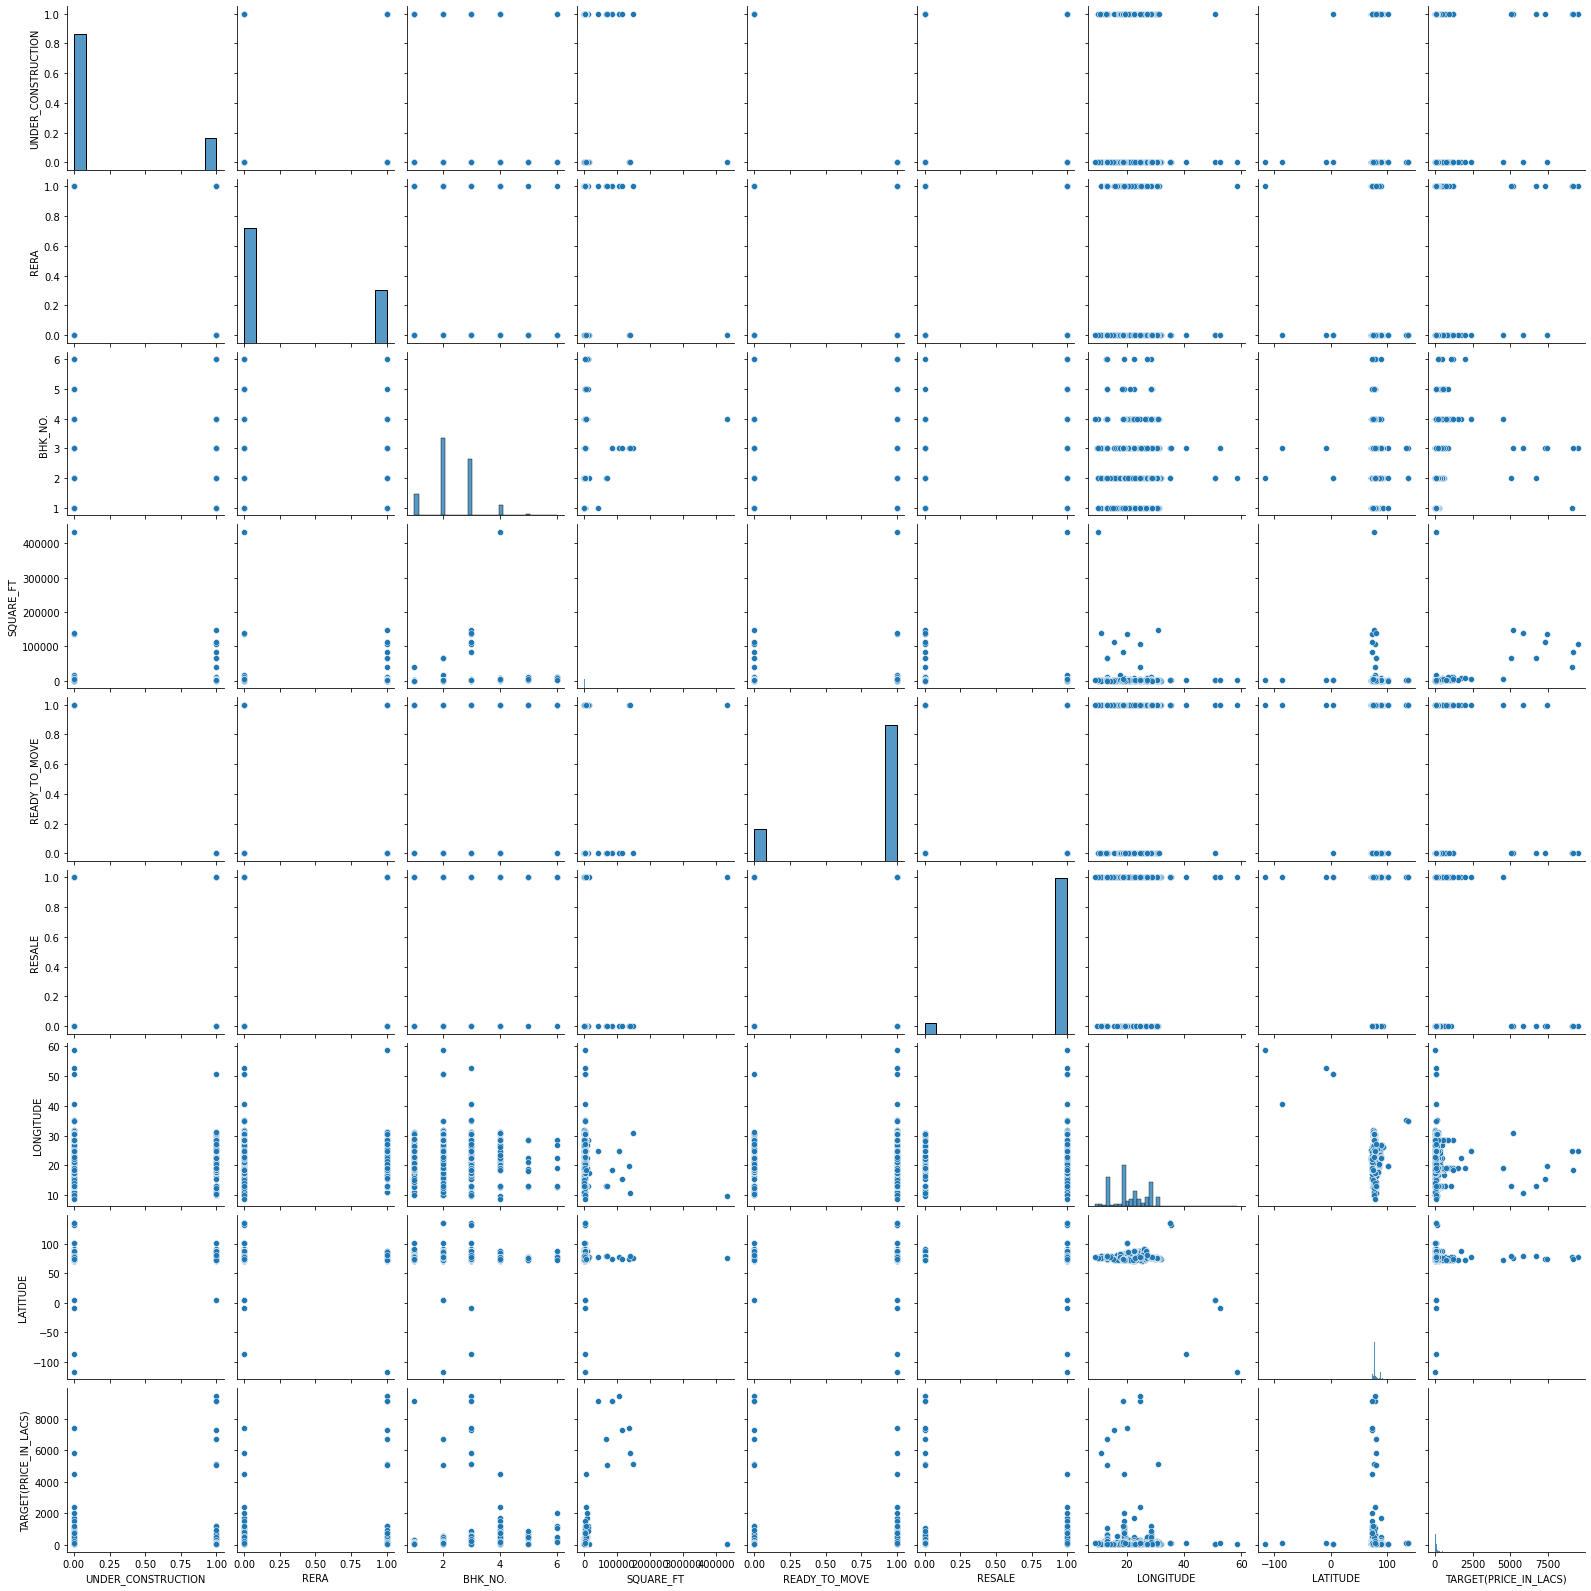

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.pairplot(data.iloc[:2000, :])
#doesn't help because every value is 0 or 1

In [ ]:
data.isnull().count()

POSTED_BY                29451
UNDER_CONSTRUCTION       29451
RERA                     29451
BHK_NO.                  29451
SQUARE_FT                29451
READY_TO_MOVE            29451
RESALE                   29451
ADDRESS                  29451
LONGITUDE                29451
LATITUDE                 29451
TARGET(PRICE_IN_LACS)    29451
dtype: int64

In [ ]:
data.dropna(axis=0,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    data[data.columns[:-1]],  data['TARGET(PRICE_IN_LACS)'], test_size=0.2)

In [ ]:
#ORDINAL ENCODER [POSTED_BY and ADRESS]
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(data.iloc[:,[0,7]])
X_train.iloc[:,[0,7]] = encoder.transform(X_train.iloc[:,[0,7]])

X_test.iloc[:,[0,7]] = encoder.transform(X_test.iloc[:,[0,7]])

In [ ]:
X_train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
24309,1.0,1,0,4,4400.586745,0,1,6862.0,28.602325,77.401994
4495,1.0,1,0,1,592.800528,0,1,3431.0,18.669919,73.853723
8571,2.0,0,0,1,549.853372,1,1,411.0,21.170000,72.830000
12319,1.0,1,1,4,2080.332853,0,0,3397.0,13.072650,80.176063
27536,2.0,0,0,3,1500.000000,1,1,6758.0,27.494145,77.465069
...,...,...,...,...,...,...,...,...,...,...
25411,1.0,0,1,1,597.014925,1,1,3196.0,12.835600,80.168200
22996,1.0,0,1,2,567.123066,1,0,2485.0,24.690280,78.418890
23338,1.0,0,1,3,1767.272727,1,1,4135.0,20.353795,85.821020
12460,2.0,0,0,2,8723.404255,1,1,4534.0,28.671102,77.329251


In [ ]:
# Skaliranje na vrednostite, imame mn golemi brojki longituda itn.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.65113149,  2.13247398, -0.68430892, ...,  1.67039255,
         1.16787967,  0.05278941],
       [-0.65113149,  2.13247398, -0.68430892, ..., -0.05795274,
        -0.43116029, -0.27554627],
       [ 1.28974123, -0.4689389 , -0.68430892, ..., -1.57925929,
        -0.02866673, -0.37027544],
       ...,
       [-0.65113149, -0.4689389 ,  1.46132831, ...,  0.29668296,
        -0.16006937,  0.83183549],
       [ 1.28974123, -0.4689389 , -0.68430892, ...,  0.49767677,
         1.17895223,  0.04605821],
       [ 1.28974123, -0.4689389 , -0.68430892, ..., -1.1742492 ,
         1.43587938,  0.10877303]])

In [ ]:
#  Training the model using  Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, Y_train)

r_sq = model.score(X_train, Y_train)

print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

coefficient of determination: 0.27415100926207747
intercept: 138.04411447166038
slope: [-3.05164255e+01  9.82409857e+13  3.93359375e+00  5.12695312e+01
  2.39926270e+02  9.82409857e+13 -9.47890625e+01 -9.16015625e+00
 -7.21484375e+00 -1.26855469e+01]


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([ 5.13974095e+02,  4.73366457e+01,  2.18780457e+01,  1.72190618e+02,
        1.09216793e+02,  2.89357437e+01,  5.95437371e+01,  1.87696650e+02,
       -3.38018230e+01,  2.87325874e+01,  1.49511684e+01,  1.40628184e+02,
        6.73364943e+01,  8.33101929e+01,  8.88577221e+01,  3.29160181e+01,
        8.94343791e+01,  1.88343530e+02,  1.44287106e+02,  9.36305747e+01,
        2.82308908e+01,  1.71884983e+02,  9.51386684e+01,  5.21570258e+02,
        4.45029550e+01,  5.50745352e+01,  5.88024588e+01,  8.52115671e+01,
       -2.81948319e+01,  5.94327860e+02,  1.02153986e+02,  5.23834618e+02,
        2.97297528e+01,  5.93823522e+02,  1.05315784e+02,  1.26010749e+02,
        9.21794995e+01,  1.47625319e+02,  3.95421476e+01,  4.10905131e+01,
        9.33684663e+01,  8.93795853e+01,  3.22513371e+01,  9.25590085e+01,
        8.74569136e+01,  2.30319412e+01,  8.49107423e+01,  5.42258184e+02,
        1.45991160e+02,  6.28942171e+01,  1.47067627e+02,  4.04552020e+01,
        1.58582432e+02,  

In [ ]:
##Linear regression accuracy

from sklearn.metrics import r2_score

r2_score(Y_test,y_pred)

Accuracy: 0.4552743075290442


0.4552743075290442

In [ ]:
# Prediction model - Logistic regression -  nesaka 

In [ ]:
#  Building Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)

print("Accuracy:",regressor.score(X_test, Y_test))

Accuracy: 0.8996509112780425


The decision tree regressor has proven to have better scores on the same training and testing data samples.

In [ ]:
!pip install tpot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tpot import TPOTRegressor
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, Y_train)

print(tpot.score(X_test, Y_test))
tpot.export('tpot_digits_pipeline.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -68732.23524621461

Generation 2 - Current best internal CV score: -68732.23524621461

Generation 3 - Current best internal CV score: -66119.89356394051

Generation 4 - Current best internal CV score: -66119.89356394051

Generation 5 - Current best internal CV score: -66119.89356394051

Best pipeline: LassoLarsCV(XGBRegressor(input_matrix, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.45, verbosity=0), normalize=False)
-8891.999318271528


In [ ]:
#Better solution

#Read the dataset
import pandas as pd
import numpy as np

data=pd.read_csv('/content/drive/MyDrive/Data Science/lab/lab3/train.csv')
data=data.iloc[:2000,:]
data

In [ ]:
data.drop(['BHK_OR_RK'], axis=1, inplace=True)

In [ ]:
#Ordinal encoder for address and posted by
# from sklearn.preprocessing import LabelEncoder

# encoder=LabelEncoder()
# data['ADDRESS'] = encoder.fit_transform(data['ADDRESS'])
# data['POSTED_BY'] = encoder.fit_transform(data['POSTED_BY'])
from sklearn.preprocessing import OrdinalEncoder

encoder=OrdinalEncoder()
encoder.fit(data.iloc[:, [0,7]])

data.iloc[:, [0,7]] = encoder.transform(data.iloc[:, [0,7]])

data.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    data[data.columns[:-1]], data['TARGET(PRICE_IN_LACS)'],test_size=0.2)


X_train

In [ ]:
#sklairanje

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Buidling the model using linear regression
#Training the model using lin regr

from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, Y_train)

r_sq = model.score(X_train, Y_train)

print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

In [ ]:
#Buiding Decision tree regression model

from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

regressor.fit(X_train, Y_train)

y_pred = regressor.predict(X_test)

In [ ]:
print("Accuracy:",regressor.score(X_test, Y_test))